In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
# Load Dataset

df = pd.read_csv("/content/House Price Prediction Dataset.csv")

# Display first 5 rows
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
# Check all values
print(df.isna())

         Id   Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  \
0     False  False     False      False   False      False     False   
1     False  False     False      False   False      False     False   
2     False  False     False      False   False      False     False   
3     False  False     False      False   False      False     False   
4     False  False     False      False   False      False     False   
...     ...    ...       ...        ...     ...        ...       ...   
1995  False  False     False      False   False      False     False   
1996  False  False     False      False   False      False     False   
1997  False  False     False      False   False      False     False   
1998  False  False     False      False   False      False     False   
1999  False  False     False      False   False      False     False   

      Condition  Garage  Price  
0         False   False  False  
1         False   False  False  
2         False   False  False  
3  

In [5]:
print(df.isna().sum())

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64


In [6]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

,0


In [7]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (2000, 10) 

number of rows:  2000
number of columns:  10


In [8]:
# viewing the data types of columns
df.dtypes

,0
Id,int64
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object
Price,int64


In [10]:
# Statistical summary
df.describe(include='all')

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000,2000,2000,2000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,4,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,Downtown,Fair,No,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,558,521,1038,NaN
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,NaN,NaN,NaN,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,NaN,NaN,NaN,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,NaN,NaN,NaN,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,NaN,NaN,NaN,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,NaN,NaN,NaN,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,NaN,NaN,NaN,780086.000000


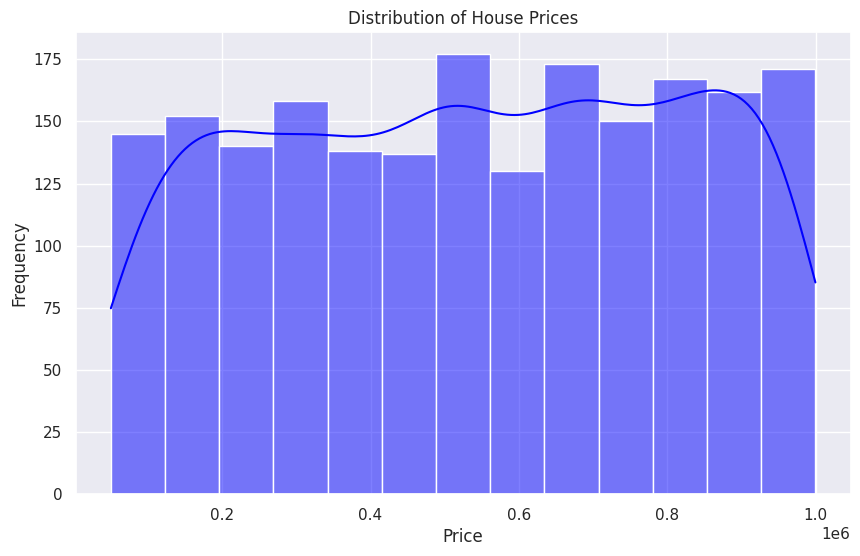

In [11]:
#Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

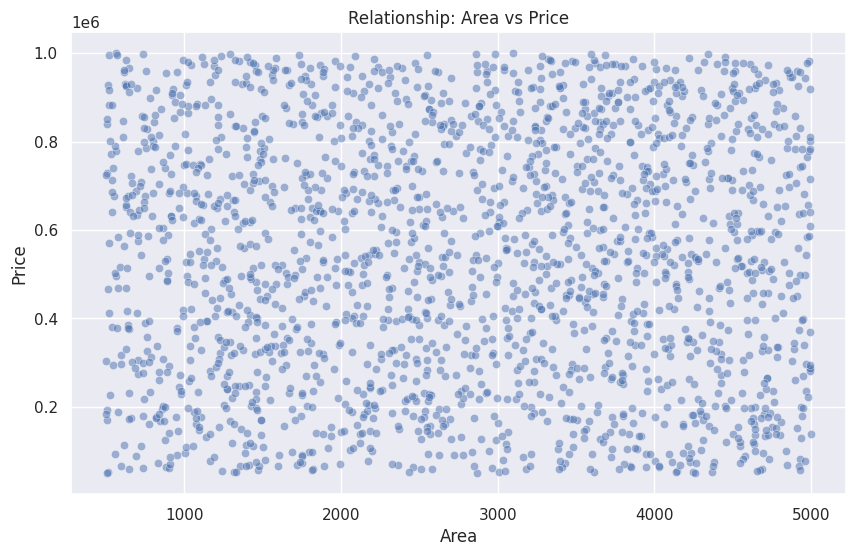

In [12]:
# Relationship between the area and the price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Area', y='Price', alpha=0.5)
plt.title('Relationship: Area vs Price')
plt.show()

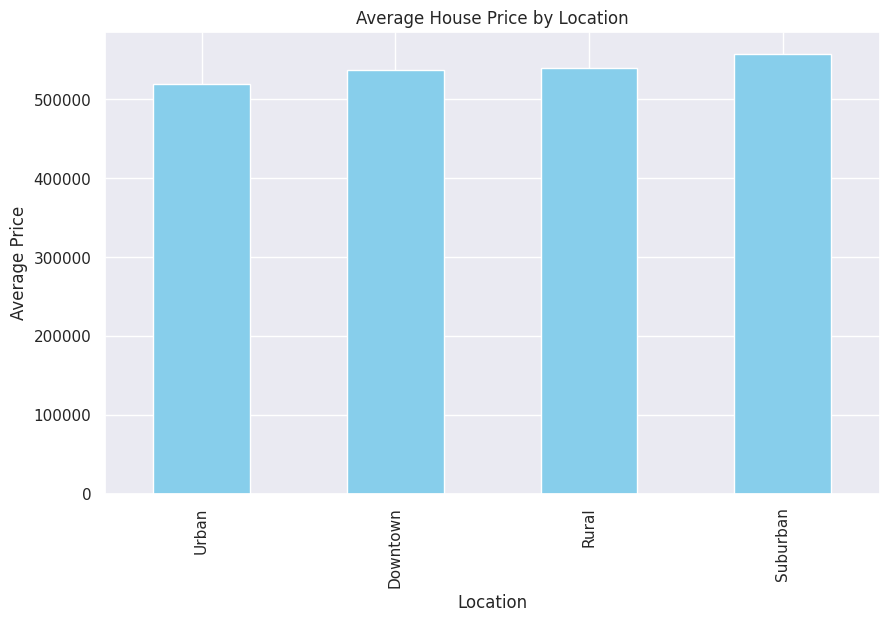

In [13]:
# Average price based on location
avg_price_location = df.groupby('Location')['Price'].mean().sort_values()
avg_price_location.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average House Price by Location')
plt.ylabel('Average Price')
plt.show()

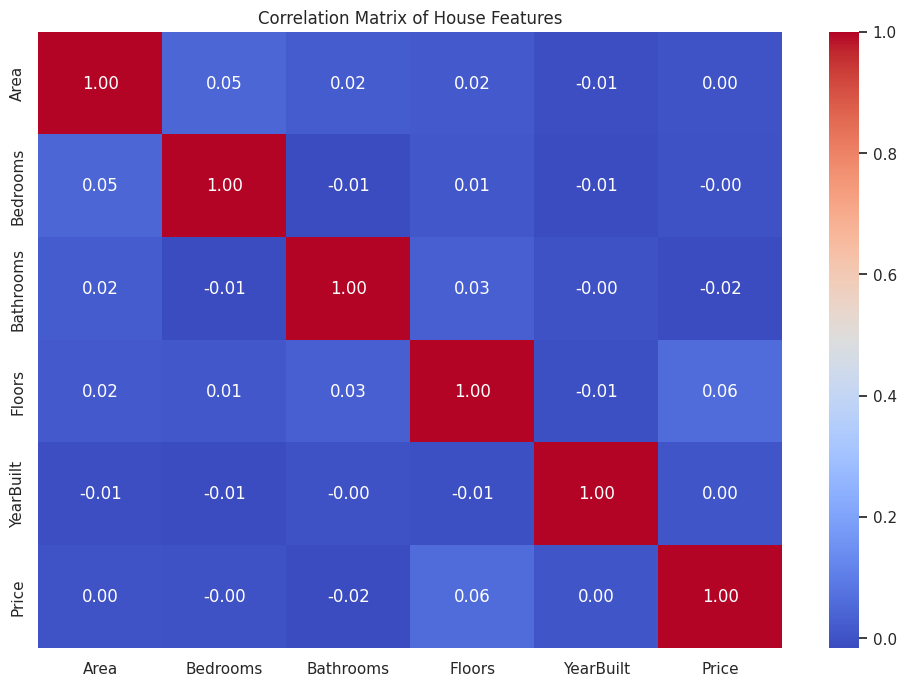

In [15]:
# We select only the numerical columns and exclude the ID.
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Id'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of House Features')
plt.show()